In [3]:
%run Data.ipynb
import numpy as np
size = 40
X,y,info,oryginal = get_data(size,flat=True);
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.01, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

oryginal_isotherms: 861
oryginal_bet: 861
oryginal_info: 861 

flat=True, returned one dimension data
X (861, 80)
y (861,)
info 861
oryginal_isotherms 861
return: X, y, info, oryginal_isotherms
852
9


In [4]:
epochs_number = 300
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(size)),  
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=10,validation_split=0.1, verbose=2)
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")


Epoch 1/300
77/77 - 2s - 27ms/step - loss: 1022.9348 - mae: 1022.9348 - mse: 1472295.7500 - val_loss: 991.4265 - val_mae: 991.4265 - val_mse: 1359958.6250
Epoch 2/300
77/77 - 0s - 2ms/step - loss: 952.2995 - mae: 952.2995 - mse: 1262411.0000 - val_loss: 825.3218 - val_mae: 825.3218 - val_mse: 896567.3750
Epoch 3/300
77/77 - 0s - 2ms/step - loss: 629.1047 - mae: 629.1047 - mse: 544052.5000 - val_loss: 513.5546 - val_mae: 513.5546 - val_mse: 379648.7812
Epoch 4/300
77/77 - 0s - 2ms/step - loss: 507.0454 - mae: 507.0454 - mse: 349785.7812 - val_loss: 490.6734 - val_mae: 490.6734 - val_mse: 342903.4062
Epoch 5/300
77/77 - 0s - 2ms/step - loss: 489.2568 - mae: 489.2568 - mse: 324836.0312 - val_loss: 468.0110 - val_mae: 468.0110 - val_mse: 309049.0000
Epoch 6/300
77/77 - 0s - 2ms/step - loss: 468.6665 - mae: 468.6665 - mse: 302001.7188 - val_loss: 439.4320 - val_mae: 439.4320 - val_mse: 272061.6875
Epoch 7/300
77/77 - 0s - 2ms/step - loss: 441.1276 - mae: 441.1276 - mse: 267985.4688 - val_lo

In [5]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [39.89904022216797, 39.89904022216797, 2896.341796875]
mae = 39.89904022216797
mse = 2896.341796875


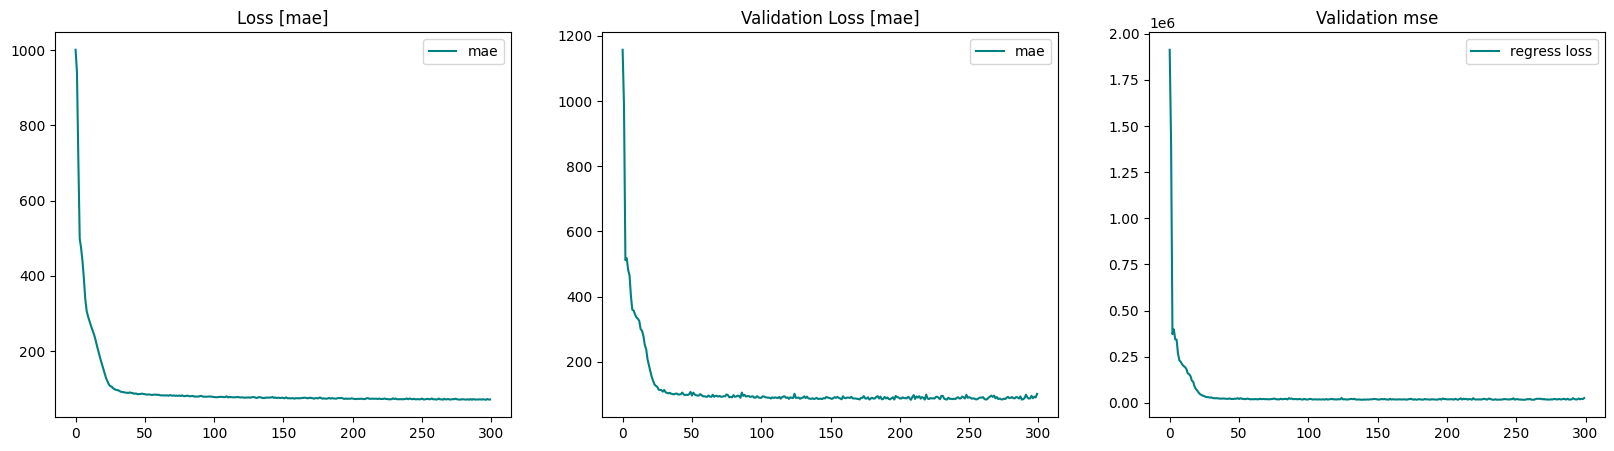

In [71]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [72]:
error_threshold = 50
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [999.4356]     1030.0 <-- rzeczyswista     blad: [30.564392]  ['Data45', 'C-800-60', '1']
 przewidywana --> [393.81735]     429.0 <-- rzeczyswista     blad: [35.182648]  ['Data62', '200AC', '7']
 przewidywana --> [2124.4685]     2225.0 <-- rzeczyswista     blad: [100.531494]  ['Data20', 'KOH-6-1', '1']
 przewidywana --> [1882.4371]     1840.0 <-- rzeczyswista     blad: [42.437134]  ['Data60', '800', '1']
 przewidywana --> [557.4755]     659.0 <-- rzeczyswista     blad: [101.524475]  ['Data155', 'RK-600', '3']
max error: [101.524475]  dla ['Data155', 'RK-600', '3'] 
for error thteshold[50] - 77.78%     7 izotermy na 9


In [58]:
# model.save("model_1000.keras")

In [4]:
from tensorflow.keras.models import load_model
model_name = 'model_1000.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)

error_threshold = 50
max_error_threshold = 400
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [2338.237]     2746.0 <-- rzeczyswista     blad: [407.76294]  ['Data3', 'A-3', '1']
 przewidywana --> [1595.2689]     991.95 <-- rzeczyswista     blad: [603.3189]  ['Data153', 'GC-C02', '4']
 przewidywana --> [856.1223]     1315.0 <-- rzeczyswista     blad: [458.8777]  ['Data47', 'ACF45M-HNO3', '3']
 przewidywana --> [3009.452]     2540.0 <-- rzeczyswista     blad: [469.4519]  ['Data66', 'AC-500', '2']
 przewidywana --> [1158.4313]     631.0 <-- rzeczyswista     blad: [527.4313]  ['Data77', 'PAC200-2', '3_1']
 przewidywana --> [561.8864]     1058.0 <-- rzeczyswista     blad: [496.1136]  ['Data86', 'ACK3', '2']
 przewidywana --> [824.4963]     1277.0 <-- rzeczyswista     blad: [452.50372]  ['Data148', 'WN800', '1_2']
max error: [603.3189]  dla ['Data153', 'GC-C02', '4'] 
for error thteshold[50] - 56.07%     97 izotermy na 173


In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173